***
#  一.  计算机中如何表示图像

+ 图像-像素-通道-灰度值
+ 数值表示通道灰度，0表示黑色，255表示最亮
+ 彩色通道一般是RGB,灰度图只有一个通道
+ 一张图片可以用一个三维矩阵来表示$[rows,cols,channels]$



***
# 二.  图像的读取和保存
彩色图像读取和灰度图像读取
```python
cv2.imread
cv2.IMREAD_COLOR
cv2.IMREAD_GRAYSCALE

cv2.imwrite
```

In [17]:
import cv2 #opencv 读取的格式 BGR
import matplotlib.pyplot as plt #画图
import numpy as np #矩阵数据结构

def cv_show(name,img):
    cv2.imshow(name,img);
    cv2.waitKey(0);#等待用户按键盘退出,非0时单位是ms
    cv2.destroyAllWindows();#销毁所有绘图窗口

# %matplotlib inline #不跳出窗口直接在笔记中画图
img = cv2.imread('lena.jpg')
cv_show('image',img)


In [18]:
img.shape #打印矩阵大小 [H,W,C]  C[B,G,R]

(512, 512, 3)

In [19]:
# 将彩色图以灰度图读入
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show('gray',img)
img #只有一个通道了

array([[132, 134, 134, ...,  96,  97,  97],
       [134, 133, 135, ...,  97,  97,  96],
       [136, 131, 136, ...,  98,  98,  98],
       ...,
       [108, 111, 116, ...,  48,  47,  48],
       [107, 111, 113, ...,  47,  47,  51],
       [100, 108, 111, ...,  48,  49,  55]], dtype=uint8)

In [20]:
img.shape#只有两个维度了

(512, 512)

In [21]:
cv2.imwrite('mylena.jpg',img)

True

In [22]:
#类型
type(img)

numpy.ndarray

In [23]:
#像素点个数
img.size

262144

In [24]:
img.dtype

dtype('uint8')

***
# 三.  视频读取
+ 视频也是由图像组成的
```python
cv2.VideoCaputure()
```
+ 可以捕获摄像头，用数字来控制不同的设备.
+ 如果是视频文件，直接指定号路径即可


In [25]:
vc = cv2.VideoCapture('box.mp4')

In [26]:
# 检查是否正确打开
if vc.isOpened():
    opened,frame = vc.read()
else:
    opened = False

In [27]:
opened

True

In [28]:
while opened:
    ret,frame = vc.read()
    if frame is None:
        break;
    if ret == True:
        # 转为灰度图
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        # 在同一个窗口上覆盖显示
        cv2.imshow('result',gray);
        # 控制帧率,  27 表示ESC键
        if cv2.waitKey(5) & 0xff == 27:
            break
        
vc.release()
cv2.destroyAllWindows();

***
# 四.  ROI处理
## 4.1  截取部分图像数据
```pyhon
img = cv2.imread('lena');
roi_img = img[0:200,0:200];
cv_show('part',roi_img);
```
## 4.2  颜色通道提取
```python
r,g,b = cv2.split(img);
```
## 4.3  颜色合并
```python
r[:] = 255;
merge_img = cv2.merge(r,g,b);
```

In [37]:
# 截取部分图像
img = cv2.imread('lena.jpg');
roi_img = img[0:200,0:200];
cv_show('part',roi_img);

In [30]:
#颜色分离
r,g,b = cv2.split(img);
cv_show('r',r);

In [31]:
#颜色合并
r[:] = 255;
g[:] = 0;
merge_img = cv2.merge((b,g,r));
cv_show('merge_img',merge_img);

***
# 五.  边界填充
```python
cv2.copyMakeBorder
BORDER_REPLICATE #复制法,复制最边缘像素
BORDER_REFLECT # 反射法,对感兴趣的图像中的像素在两边复制
BORDER_REFLECT_101 # 反射法，以最边缘像素为轴，对称
BORDER_WRAP # 外包装法
BORDER_CONSTANT # 常量法
```

In [48]:
top_size,buttom_size,left_size,right_size = (100,100,100,100);
# 不同的填充方法
replicate = cv2.copyMakeBorder(img,top_size,buttom_size,left_size,right_size,borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,buttom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT);
reflect101 = cv2.copyMakeBorder(img,top_size,buttom_size,left_size,right_size,borderType = cv2.BORDER_REFLECT_101);
wrap = cv2.copyMakeBorder(img,top_size,buttom_size,left_size,right_size,borderType = cv2.BORDER_WRAP);
constant = cv2.copyMakeBorder(img,top_size,buttom_size,left_size,right_size,borderType = cv2.BORDER_CONSTANT,value = 0);

Text(0.5, 1.0, 'Constant')

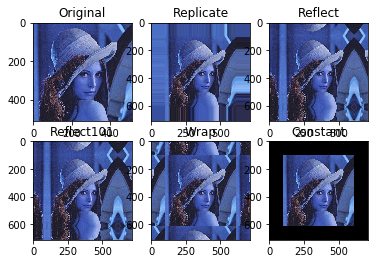

In [49]:
plt.subplot(2,3,1)
plt.imshow(img,'gray')
plt.title('Original')
plt.subplot(2,3,2)
plt.imshow(replicate,'gray')
plt.title('Replicate')
plt.subplot(2,3,3)
plt.imshow(reflect,'gray')
plt.title('Reflect')
plt.subplot(2,3,4)
plt.imshow(reflect101,'gray')
plt.title('Reflect101')
plt.subplot(2,3,5)
plt.imshow(wrap,'gray')
plt.title('Wrap')
plt.subplot(2,3,6)
plt.imshow(constant,'gray')
plt.title('Constant')


***
# 六.  数值计算

```python
new_img1 = img + 20 #每个像素都加20 若越界会自动取余
new_img2 = cv2.add(img,20);#每个像素都加20 若上越界会自动取255
```

Text(0.5, 1.0, 'Constant Up(add)')

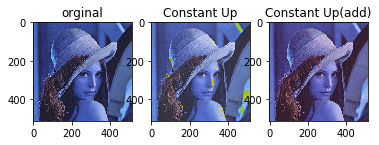

In [55]:
new_img1 = img + 20
new_img2 = cv2.add(img,20);
plt.subplot(1,3,1)
plt.imshow(img,'gray')
plt.title('orginal')
plt.subplot(1,3,2)
plt.imshow(new_img1,'gray')
plt.title('Constant Up')
plt.subplot(1,3,3)
plt.imshow(new_img2,'gray')
plt.title('Constant Up(add)')



***
# 七.  图像融合
+ 将两个shape一致的图片进行融合 $addWeighted$.
+ 若不一样则需要$resize$.


Text(0.5, 1.0, 'img_two')

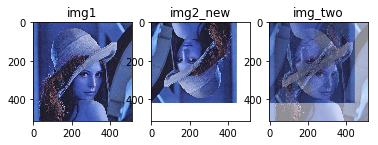

In [60]:
img1 = cv2.imread('lena.jpg');
img2 = cv2.imread('lena_reverse.jpg');
img1.shape #(512,512,3)
img2_new = cv2.resize(img2,(512,512));
image_two = cv2.addWeighted(img1,0.5,img2_new,0.5,0);# 0 is bais
plt.subplot(1,3,1)
plt.imshow(img1,'gray')
plt.title('img1')
plt.subplot(1,3,2)
plt.imshow(img2_new,'gray')
plt.title('img2_new')
plt.subplot(1,3,3)
plt.imshow(image_two,'gray')
plt.title('img_two')